# 🧮 NumPy

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/stanbaek/stanbaek.github.io/blob/main/docs/workshops/NumPy.ipynb)


**Goal:** Develop fluency with NumPy arrays and foundational data visualization using Matplotlib.
**Time:** 1.0 hours  
**Prereqs:** Python lists, loops, basic functions. Some exposure to matrix concepts helpful.  

## Agenda  
- NumPy arrays: creation, shape, and indexing
- Array generation: zeros, arange, linspace, and reshaping
- Element-wise operations & matrix math
- Array manipulation: flattening, transposing, inserting
- Intro to Matplotlib: basic plots and visualizing arrays

References: 
- [NumPy Quickstart Guide](https://numpy.org/doc/stable/user/quickstart.html)
- [NumPy user guide](https://numpy.org/doc/stable/user/index.html)
- [NumPy for MATLAB users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)


NumPy is the backbone of numerical computing in Python. Whether you're modeling sensor data, manipulating matrices, or preparing inputs for machine learning, NumPy arrays offer the speed, structure, and flexibility that native Python lists simply can't match. This section introduces the core building blocks: how arrays are created, shaped, and operated on — all with the precision and performance needed for scientific work.

## 1. NumPy Fundamentals

Let’s start by building intuition around arrays and their dimensions, then move into hands-on creation and manipulation.

### Creating Arrays

You can create an array from a Python list or tuple using the `array` function. The resulting array's type is deduced from the elements in the sequence.

In [2]:
import numpy as np
a = np.array([2, 3, 4])
print(a)
print(type(a))    # Output: <class 'numpy.ndarray'>
print(a.dtype)    # Output: int64 or int32, depending on your system
b = np.array([1.2, 3.5, 5.1])
print(type(b))    # Output: <class 'numpy.ndarray'>
print(b.dtype)    # Output: float64 

[2 3 4]
<class 'numpy.ndarray'>
int64
<class 'numpy.ndarray'>
float64


A common mistake is passing multiple arguments to `array` instead of a single sequence:

In [ ]:
# a = np.array(1, 2, 3, 4)  # WRONG
# TypeError: array() takes from 1 to 2 positional arguments but 4 were given

a = np.array([1, 2, 3, 4])  # RIGHT

`np.array` can transform sequences of sequences into 2D arrays, sequences of sequences of sequences into 3D arrays, and so on.

In [39]:
b = np.array([(1.5, 2, 3), (4, 5, 6)])
print(b)
print(b.ndim)    # dimension: 2
print(b[0])   # first row
print(b[0][0]) # first element of first row
print(b[0,0])  # first element of first row

[[1.5 2.  3. ]
 [4.  5.  6. ]]
2
[1.5 2.  3. ]
1.5
1.5


### Creating Arrays with Functions
NumPy provides several functions to create arrays:
- `np.zeros`: Creates an array filled with zeros.
- `np.ones`: Creates an array filled with ones.
- `np.empty`: Creates an uninitialized array with random content based on memory state.

In [16]:
# Predefined Values
a = np.zeros((2, 6)) # 2x6 array of zeros
print(a)
b = np.ones((2, 3, 4), dtype=np.int16) # 3D array of ones
print(b)
c = np.empty((2, 3)) # 2x3 uninitialized array
print(c)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]
[[0.3 0.6 0.9]
 [1.2 1.5 1.8]]


To create sequences of numbers, NumPy provides the `arange` function which is analogous to the Python built-in range, but returns an array.

In [17]:
a = np.arange(10, 30, 5)
print(a)
b = np.arange(0, 2, 0.3)  
print(b)  # 9 numbers from 0 to 2

[10 15 20 25]
[0.  0.3 0.6 0.9 1.2 1.5 1.8]


When `arange` is used with floating point arguments, it is generally not possible to predict the number of elements obtained, due to the finite floating point precision. For this reason, it is usually better to use the function `linspace` that receives as an argument the number of elements that we want, instead of the step:

In [18]:
a = np.linspace(0, 2, 9) # 9 numbers from 0 to 2
print(a)
b = np.linspace(0, 2 * np.pi, 100)  # useful to evaluate function at lots of points
print(b)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.394

### Basic Operations

Arithmetic operations on NumPy arrays apply element-wise:

In [21]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
print(a,b)
c = a - b   # Element-wise subtraction
print(c)
d = b**2    # Element-wise exponentiation
print(d)
e = 10 * np.sin(a)   # Element-wise sine
print(e)

[20 30 40 50] [0 1 2 3]
[20 29 38 47]
[0 1 4 9]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]


**Matrix multiplication**: The `*` operator in NumPY performs element-wise multiplication, not matrix multiplication. Use the `@` operator, `.dot`, `np.dot()`, or `np.matmul()` for matrix multiplication:

In [25]:
A = np.array([[1, 1], [0, 1]])
B = np.array([[2, 0], [3, 4]])
print(A)
print(B)
print(A * B)        # Element-wise multiplication
print(A @ B)        # Matrix multiplication
print(A.dot(B))         # Matrix multiplication
print(np.dot(A, B))     # Matrix multiplication
print(np.matmul(A,B))   # Matrix multiplication

[[1 1]
 [0 1]]
[[2 0]
 [3 4]]
[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


**Python list vs. NumPy array**: A key difference between a Python list and a NumPy array is how they handle mathematical operations. While both can store numbers like integers or floats, you cannot perform element-wise mathematical operations directly on a list. In contrast, NumPy arrays are designed for such operations.

For example, with a NumPy array, you can perform operations like addition, multiplication, and exponentiation directly, while with a Python list, these operations do not behave as expected:

In [28]:
# NumPy array
a = np.array([1, 2, 3])
print(a + a)   # [2 4 6]
print(a * 3)   # [3 6 9]
print(a ** 2)  # [1 4 9]

[2 4 6]
[3 6 9]
[1 4 9]


In [30]:
# Python list
b = [1, 2, 3]
print(b + b)   # [1, 2, 3, 1, 2, 3] (concatenation, not addition)
print(b * 3)   # [1, 2, 3, 1, 2, 3, 1, 2, 3] (repetition, not multiplication)
# print(b ** 2)  # Error: unsupported operand type(s) for ** or pow()

[1, 2, 3, 1, 2, 3]
[1, 2, 3, 1, 2, 3, 1, 2, 3]


NumPy arrays are optimized for numerical and matrix computations, making them far more efficient for mathematical operations compared to Python lists.

### Understanding NumPy Dimensions

NumPy arrays can have zero, one, or multiple dimensions. These dimensions (called **axes**) determine how arrays behave during indexing, broadcasting, and matrix operations. Even small syntax differences can lead to very different shapes.

#### Scalar Arrays: 
A **0D array** is essentially a NumPy-wrapped scalar. It behaves like a number but supports NumPy operations.

In [63]:
a = np.array(2)
print(a)           # Output: 2
print(a.shape)     # Output: () — scalar has no dimensions
print(a.ndim)      # Output: 0 — zero-dimensional array

2
()
0


#### 1D Arrays: Subtle Syntax Differences
Both `b` and `c` are 1D arrays with one element. The trailing comma in `[2,]` is optional — it just emphasizes that this is a sequence.

In [64]:
b = np.array([2])
c = np.array([2,])
print(b.shape)     # (1,)
print(c.shape)     # (1,)
print(b.ndim)      # 1

(1,)
(1,)
1


### 2D Arrays: Row vs Column Vectors
The shapes matter when performing matrix multiplication, reshaping, or feeding data into ML models.


In [65]:
x = np.array([[2]])        # shape: (1, 1)
y = np.array([[1, 2, 3]])  # shape: (1, 3) — row vector
z = np.array([[1], [2], [3]])  # shape: (3, 1) — column vector

print(x.shape)
print(y.shape)
print(z.shape)

(1, 1)
(1, 3)
(3, 1)


#### Quick Check
Use `.ndim` to check the number of dimensions and `.shape` to inspect the size along each axis.

In [66]:
print(np.array(2).ndim)         # 0
print(np.array([2]).ndim)       # 1
print(np.array([[2]]).ndim)     # 2

0
1
2


### Indexing, Slicing, and Iteration
NumPy arrays can be indexed and sliced similarly to Python lists:

In [35]:
a = np.arange(10)**3
print(a)
print(a[2])     # access an element
print(a[1:5])   # from index 1 to 5, exclusive
print(a[1:5:1]) # from index 1 to 5, exclusive, step 1
print(a[1:5:2]) # from index 1 to 5, exclusive, step 2
print(a[::-1])  # Reverse the array
print(a[1:])    # from index 1 to the end
print(a[:4])    # equivalent to a[0:4]
print(a[-4:-2]) # negative indices

# equivalent to a[0:6:2] = 1000;
# from start to position 6, exclusive, set every 2nd element to 1000
a[:6:2] = 1000
print(a)

[  0   1   8  27  64 125 216 343 512 729]
8
[ 1  8 27 64]
[ 1  8 27 64]
[ 1 27]
[729 512 343 216 125  64  27   8   1   0]
[  1   8  27  64 125 216 343 512 729]
[ 0  1  8 27]
[216 343]
[1000    1 1000   27 1000  125  216  343  512  729]


Two-dimensional arrays can be indexed like matrices:

In [40]:
arr2 = np.array([[1,2,3,4,5],[6,7,8,9,10]])
print(arr2)
print(arr2[0,:]) # first row
print(arr2[:,4]) # last column
print(arr2[1,1:4]) # second row, columns 1 to 4 (exclusive)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[1 2 3 4 5]
[ 5 10]
[7 8 9]


### NumPy Manipulation Routines

NumPy provides many routines for reshaping, flattening, and manipulating arrays:

In [42]:
x = np.array([[1,2,3],[4,5,6]])
print(x)
print(np.shape(x)) # returns the array shape or matrix dimension
print(x.shape)     # shape is a property of numpy.array

[[1 2 3]
 [4 5 6]]
(2, 3)
(2, 3)


In [43]:
# we can change the array shape
y = np.reshape(x,[3,2])
print(y)
print(y.shape)     #  array shape 

[[1 2]
 [3 4]
 [5 6]]
(3, 2)


In [44]:
# flatten an array
z = x.flatten()
print(z)
print(z.shape)

[1 2 3 4 5 6]
(6,)


In [45]:
# transpose
y = x.T  # matrix transpose of x
print(y)
z = np.transpose(x)  # same as x.T
print(z)

[[1 4]
 [2 5]
 [3 6]]
[[1 4]
 [2 5]
 [3 6]]


In [ ]:
# Insert 
x = np.array([[1,2,3],[4,5,6]])
print(x)
y = np.insert(x, [1], [[3,4,5]], axis=0)  # axis = 0 means the row 
print(y)
z = np.insert(x, [1], [[3],[4]], axis=1)  # axis = 0 means the column 
print(z)




[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [3 4 5]
 [4 5 6]]
[[1 3 2 3]
 [4 4 5 6]]


In [50]:
# Flip
y = np.fliplr(x) # reverse the order elements along the row axis (or reverse left and right)
print(y)
y = np.flipud(x) # reverse the order elements along the col axis (or reverse up and down)
print(y)

[[3 2 1]
 [6 5 4]]
[[4 5 6]
 [1 2 3]]


### Linear Algebra with `numpy.linalg` 

NumPy's linalg submodule provides many linear algebra functions:

Reference: `https://numpy.org/doc/stable/reference/routines.linalg.html#module-numpy.linalg`

In [52]:
A = np.array([[1,2],[3,4]])
print(np.linalg.det(A)) # determinant of A
print(np.linalg.inv(A)) # inverse of A
w, v = np.linalg.eig(A) # eigen values and normalized eigenvectors
print(w)
print(v) # each column of v is a normlized eigenvector associated with w in the same order. 

-2.0000000000000004
[[-2.   1. ]
 [ 1.5 -0.5]]
[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


### Logical Functions

NumPy includes several logical functions that can be applied element-wise or to entire arrays:


In [53]:
x = np.array([0,1,1]) # x is a numpy array
print(x == 0)        # check if each element is zero
print(np.all(x==0))  # check if all elements are zero
print(np.any(x==0))  # check if any elemnent is zero
print((x==0).all())  # check if all elements are zero
print((x==0).any())  # check if any elemnent is zero

[ True False False]
False
True
False
True


Python lists do not have `all()` method


In [55]:
y=[0,1,1]            # y is a list
print(np.all(y==0))  # np.all() takes a list argument
# print((y==0).all())  # a list object does not have all() method.

False


## 📊 Matplotlib Fundamentals

Matplotlib is Python’s most widely used plotting library. It allows you to visualize data, inspect trends, and communicate results clearly. In this section, we’ll use `matplotlib.pyplot` to create basic plots and annotate them for clarity.

Reference: [Matplotlib Quick Start Guide](https://matplotlib.org/stable/users/explain/quick_start.html)


### Creating a Simple Line Plot


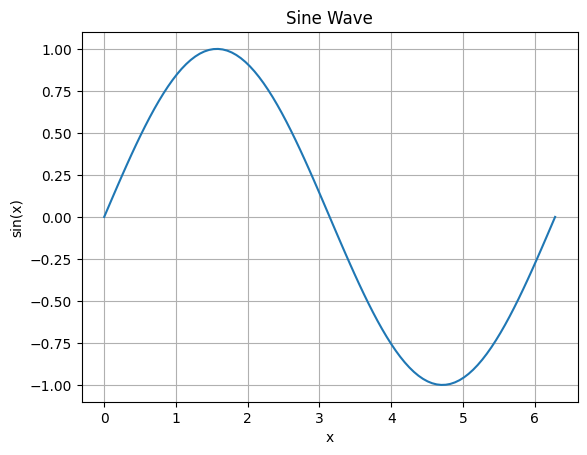

In [56]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True)
plt.show()

### Customizing Plot Appearance


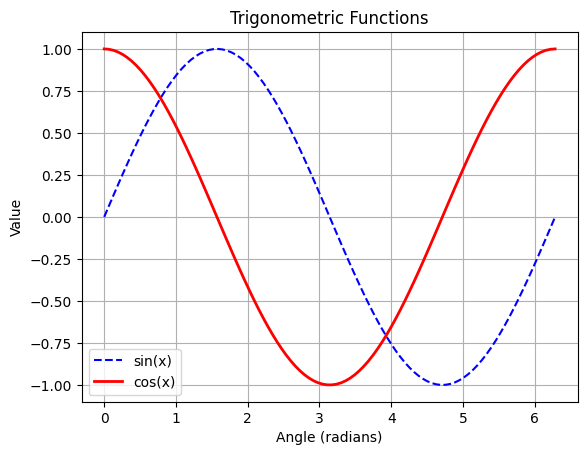

In [57]:
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label='sin(x)', color='blue', linestyle='--')
plt.plot(x, y2, label='cos(x)', color='red', linewidth=2)
plt.title("Trigonometric Functions")
plt.xlabel("Angle (radians)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

### Scatter Plot


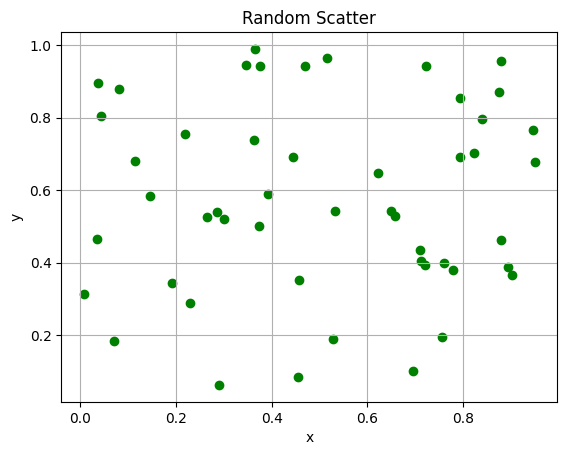

In [59]:
x = np.random.rand(50)
y = np.random.rand(50)

plt.scatter(x, y, color='green', marker='o')
plt.title("Random Scatter")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

### Subplots


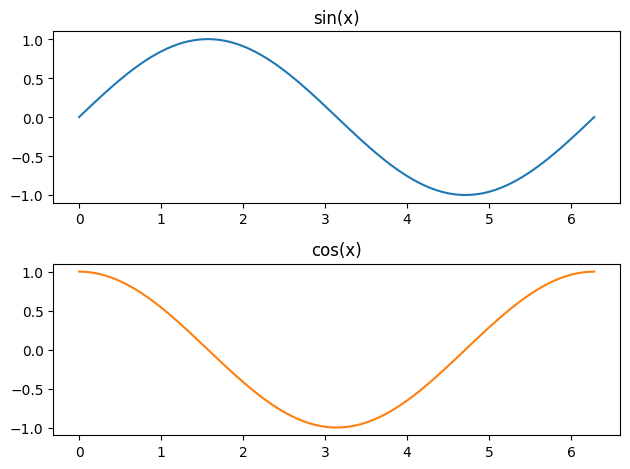

In [60]:
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, axs = plt.subplots(2)
axs[0].plot(x, y1, 'tab:blue')
axs[0].set_title('sin(x)')
axs[1].plot(x, y2, 'tab:orange')
axs[1].set_title('cos(x)')
plt.tight_layout()
plt.show()

### Histogram


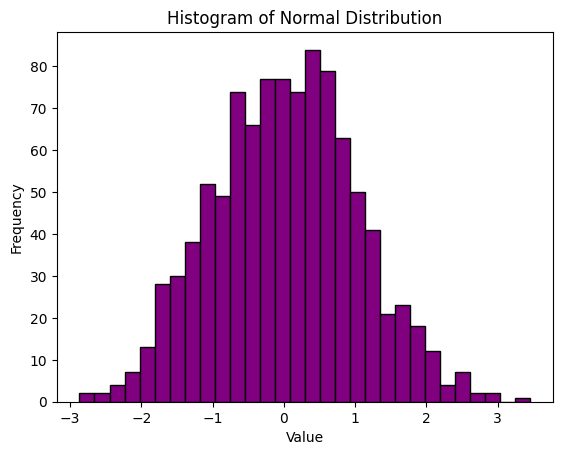

In [61]:
data = np.random.normal(0, 1, 1000)

plt.hist(data, bins=30, color='purple', edgecolor='black')
plt.title("Histogram of Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### 🧪 Mini Challenge
Use NumPy to generate a noisy sine wave and plot it alongside the clean signal. Add a legend and grid.

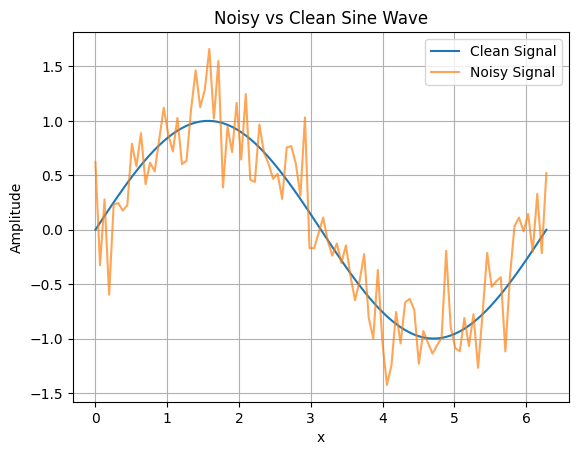

In [62]:
x = np.linspace(0, 2 * np.pi, 100)
y_clean = np.sin(x)
noise = 0.3 * np.random.randn(100)
y_noisy = y_clean + noise

plt.plot(x, y_clean, label='Clean Signal')
plt.plot(x, y_noisy, label='Noisy Signal', alpha=0.7)
plt.title("Noisy vs Clean Sine Wave")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()